In [1]:
# Import dependencies
import torch
import torch.nn as nn
from plot_lib import set_default, show_scatterplot, plot_bases
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [3]:
# Set up random seed to 1008. Do not change the random seed.
# Yes, these are all necessary when you run experiments!
seed = 1008
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

In [4]:
# Define data generating functions
def quadratic_data_generator(data_size):
    # f(x) = y = x^2 + 4x - 3
    # generate an input tensor of size data_size with torch.randn
    x = torch.randn(data_size, 1) - 2   
    x = x.to(device)
    # TODO
    y = x**2+4*x-3
    y = y.to(device)
    # placeholder
    #y = torch.ones(data_size,1)
    return x,y

def cubic_data_generator(data_size=100):
    # f(x) = y = x^3 + 4x^2 - 3
    # generate an input tensor of size data_size with torch.randn
    x = torch.randn(data_size, 1) - 2   
    x = x.to(device)
    # TODO
    y = x.pow(3)+4*(x**2)-3
    y = y.to(device)
    # placeholder
    #y = torch.ones(data_size,1)
    return x, y

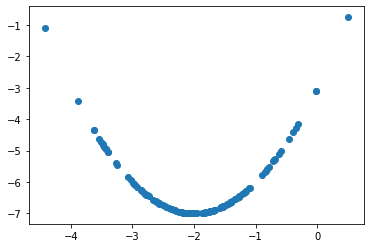

In [5]:
# Generate the data with 128 datapoints
x, y = quadratic_data_generator(128)
plt.scatter(x.cpu().numpy(),y.cpu().numpy())
plt.show()

In [6]:
# Define a Linear Classifier with a single linear layer and no non-linearity
# (no hidden layer)
class Linear_0H(nn.Module):
    def __init__(self):
        super().__init__()

        self.classifier = nn.Sequential(nn.Linear(1, 1))
    def forward(self, x):
        return self.classifier(x)

In [7]:
# Define a Linear Classifier with a single hidden layer of size 5 and ReLU non-linearity
class Linear_1H(nn.Module):
    def __init__(self):
        super().__init__()

        self.classifier =  nn.Sequential(nn.Linear(1, 5), nn.ReLU(),nn.Linear(5, 1))

    def forward(self, x):
        return self.classifier(x)

In [8]:
# Define a Linear Classifier with a two hidden layers of size 5 and ReLU non-linearity
class Linear_2H(nn.Module):
    def __init__(self):
        super().__init__()

        # TODO
        self.classifier = nn.Sequential(nn.Linear(1, 5), nn.ReLU(),nn.Linear(5, 5),nn.ReLU(),nn.Linear(5,1))

    def forward(self, x):
        return self.classifier(x)

In [9]:
'''
TODO: Training function

Hint: look at some example pytorch tutorials to learn how to
    - initialize optimizers
    - zero gradient
    - backprop the loss
    - step the gradient


Note: This is full batch. We compute forward on whole x,y.
No need for dataloaders nor loop over batches. 
Just pass all of x to model's forward pass.
'''
def train(model, epochs, x, y):
    
    # Set model to training mode
    model.train()
    model.to(device)
    # Define MSE loss function
    criterion = torch.nn.MSELoss()
    
    # TODO: Define the SGD optimizer with learning rate 0.01
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 
    
    for epoch in range(epochs):
        
        # TODO: Forward data through model to predict y
        y_pred = model(x)
        
        # TODO: Compute loss in terms of predicted and true y
        loss = criterion(y_pred, y)

        # TODO: Zero gradient
        optimizer.zero_grad()
        # TODO: call backward on loss
        loss.backward()
        # TODO: step the optimizer
        optimizer.step()
        # every 100 epochs, print
        if (epoch+1) % 100 == 0:
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
            
    # return y_pred without gradient information, for plotting
    return y_pred.detach()

Epoch 100 loss: 3.3711135387420654
Epoch 200 loss: 2.377268075942993
Epoch 300 loss: 1.8444777727127075
Epoch 400 loss: 1.5588537454605103
Epoch 500 loss: 1.4057323932647705
Epoch 600 loss: 1.3236454725265503
Epoch 700 loss: 1.2796398401260376
Epoch 800 loss: 1.2560487985610962
Epoch 900 loss: 1.2434018850326538
Epoch 1000 loss: 1.2366219758987427


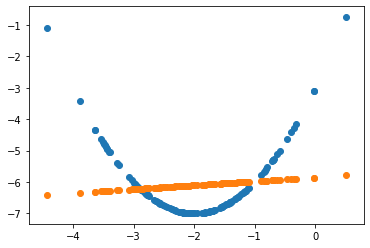

In [10]:
# 0H model on quadratic data
model = Linear_0H()
y_pred = train(model, epochs=1000, x=x, y=y)

# Plot predictions vs actual data
plt.scatter(x.cpu().numpy(), y.cpu().numpy())
plt.scatter(x.cpu().numpy(), y_pred.cpu().numpy())
plt.show()

Epoch 100 loss: 1.8421376943588257
Epoch 200 loss: 0.8967394828796387
Epoch 300 loss: 0.6937336921691895
Epoch 400 loss: 0.5439189076423645
Epoch 500 loss: 0.4211842119693756
Epoch 600 loss: 0.3246660828590393
Epoch 700 loss: 0.2539371848106384
Epoch 800 loss: 0.20531226694583893
Epoch 900 loss: 0.1738778054714203
Epoch 1000 loss: 0.15422357618808746


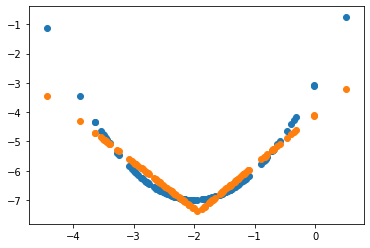

In [11]:
# 1H model on quadratic data
model = Linear_1H()
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x.cpu().numpy(), y.cpu().numpy())
plt.scatter(x.cpu().numpy(), y_pred.cpu().numpy())
plt.show()

Epoch 100 loss: 0.8756207227706909
Epoch 200 loss: 0.4980800747871399
Epoch 300 loss: 0.2565285563468933
Epoch 400 loss: 0.5319246649742126
Epoch 500 loss: 0.3199230432510376
Epoch 600 loss: 0.18399372696876526
Epoch 700 loss: 0.10868315398693085
Epoch 800 loss: 0.0771995261311531
Epoch 900 loss: 0.052102286368608475
Epoch 1000 loss: 0.05054796487092972


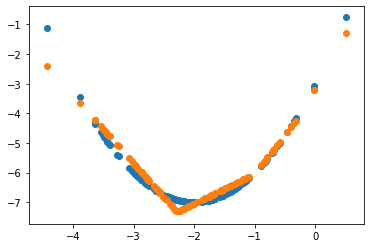

In [12]:
# 2H model on quadratic data
model = Linear_2H()
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x.cpu().numpy(), y.cpu().numpy())
plt.scatter(x.cpu().numpy(), y_pred.cpu().numpy())
plt.show()

In [28]:
# Generate cubic data with 128 data points
x, y = cubic_data_generator(128)

Epoch 100 loss: 5.796992778778076
Epoch 200 loss: 5.7899370193481445
Epoch 300 loss: 5.786278247833252
Epoch 400 loss: 5.784380912780762
Epoch 500 loss: 5.783397197723389
Epoch 600 loss: 5.782886981964111
Epoch 700 loss: 5.782622337341309
Epoch 800 loss: 5.782485485076904
Epoch 900 loss: 5.782414436340332
Epoch 1000 loss: 5.782377243041992


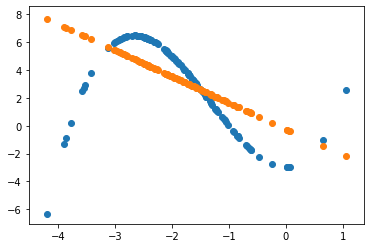

In [29]:
# 0H model on cubic data
model = Linear_0H()
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x.cpu().numpy(), y.cpu().numpy())
plt.scatter(x.cpu().numpy(), y_pred.cpu().numpy())
plt.show()

Epoch 100 loss: 8.988853454589844
Epoch 200 loss: 7.860870838165283
Epoch 300 loss: 4.844150066375732
Epoch 400 loss: 3.62964129447937
Epoch 500 loss: 3.4248554706573486
Epoch 600 loss: 3.375415086746216
Epoch 700 loss: 3.3650262355804443
Epoch 800 loss: 3.362691640853882
Epoch 900 loss: 3.3621883392333984
Epoch 1000 loss: 3.362114429473877


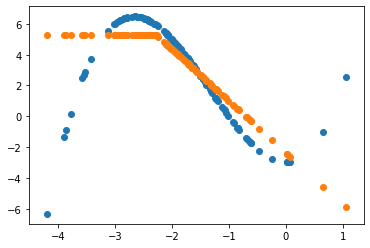

In [30]:
# 1H model on cubic data
model = Linear_1H()
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x.cpu().numpy(), y.cpu().numpy())
plt.scatter(x.cpu().numpy(), y_pred.cpu().numpy())
plt.show()

Epoch 100 loss: 7.253598690032959
Epoch 200 loss: 3.3812971115112305
Epoch 300 loss: 2.6734325885772705
Epoch 400 loss: 2.31386399269104
Epoch 500 loss: 1.8587746620178223
Epoch 600 loss: 1.2914531230926514
Epoch 700 loss: 0.817676305770874
Epoch 800 loss: 0.5080432891845703
Epoch 900 loss: 0.896574079990387
Epoch 1000 loss: 0.6203234195709229


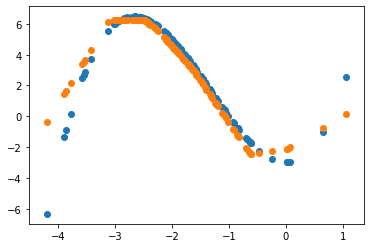

In [33]:
# 2H model on cubic data
model = Linear_2H()
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x.cpu().numpy(), y.cpu().numpy())
plt.scatter(x.cpu().numpy(), y_pred.cpu().numpy())
plt.show()

Check if problem 1 result is correct

In [17]:
import torch.nn as nn
import torch.nn.functional as F

In [18]:
A = torch.tensor(np.array([[[[4 , 5 , 2 , 2 , 1 ],
       [3 , 3 , 2 , 2 , 4 ],
       [4 , 3 , 4 , 1 , 1],
      [ 5 , 1 , 4 , 1 , 2 ],
       [5 , 1 , 3 , 1 , 4]]]]),dtype = torch.float,requires_grad=True )
B =  torch.tensor(np.array([[[[4,3,3],[5,5,5],[2,4,3]]]]),dtype = torch.float,requires_grad=True )

In [19]:
A,B

(tensor([[[[4., 5., 2., 2., 1.],
           [3., 3., 2., 2., 4.],
           [4., 3., 4., 1., 1.],
           [5., 1., 4., 1., 2.],
           [5., 1., 3., 1., 4.]]]], requires_grad=True),
 tensor([[[[4., 3., 3.],
           [5., 5., 5.],
           [2., 4., 3.]]]], requires_grad=True))

In [20]:
output = nn.functional.conv2d(A, B)

In [21]:
output

tensor([[[[109.,  92.,  72.],
          [108.,  85.,  74.],
          [110.,  74.,  79.]]]], grad_fn=<ThnnConv2DBackward>)

In [22]:
output_s = output.sum()
output_s.backward()
print(A.grad)

tensor([[[[ 4.,  7., 10.,  6.,  3.],
          [ 9., 17., 25., 16.,  8.],
          [11., 23., 34., 23., 11.],
          [ 7., 16., 24., 17.,  8.],
          [ 2.,  6.,  9.,  7.,  3.]]]])


In [23]:
print(B.grad)

tensor([[[[30., 24., 19.],
          [29., 21., 21.],
          [30., 19., 21.]]]])


In [24]:
pool_output = F.max_pool2d(output,kernel_size=2,stride=1)

In [25]:
pool_output

tensor([[[[109.,  92.],
          [110.,  85.]]]], grad_fn=<MaxPool2DWithIndicesBackward>)